In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import seaborn as sns
import itertools
from scipy.linalg import block_diag
import time
import os
import pickle
from scipy.misc import comb

In [2]:
from __future__ import print_function

import sys

import cplex
from cplex.exceptions import CplexError

In [3]:
sushi_score = np.loadtxt('./sushi3-2016/sushi3b.5000.10.score')

In [4]:
print(sushi_score[0])
print(np.where(sushi_score[0]!=-1))

[-1.  0. -1.  4.  2. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  4. -1.  2. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.
 -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  2. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
(array([ 1,  3,  4, 12, 44, 58, 60, 67, 74, 87]),)


In [64]:
sushi_order = np.loadtxt('./sushi3-2016/sushi3b.5000.10.order', skiprows=1)
flips = []
for s in range(len(sushi_order)):
    rating = sorted(zip(np.take(sushi_score[s], np.where(sushi_score[s]!=-1)[0]), np.where(sushi_score[s]!=-1)[0]), reverse=True)
    ranking = sushi_order[s][2:]
    flips.append(countflips(ranking,rating))

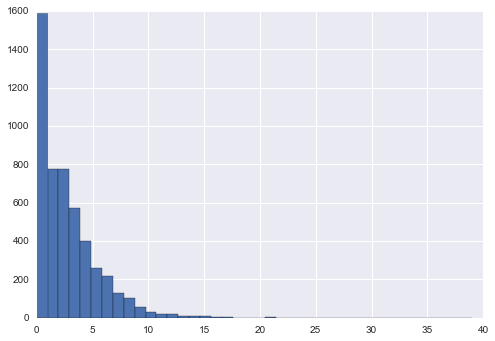

In [68]:
plt.hist(flips, bins=40)
plt.show()

In [58]:
print(rating)
print(ranking)

[(4.0, 58), (4.0, 3), (2.0, 87), (2.0, 60), (2.0, 4), (1.0, 44), (1.0, 12), (0.0, 74), (0.0, 67), (0.0, 1)]
[ 58.   4.   3.  44.  87.  60.  67.   1.  12.  74.]


In [63]:
def countflips(ranking, rating):
    counter = 0
    i=0
    while i<len(ranking):
        if ranking[i]==rating[i][1]:
            i+=1
        else:
            j = np.where([x[1] for x in rating]==ranking[i])[0][0]
#             print(j)
            for k in range(j,i,-1):
                tmp = rating[k-1]
                rating[k-1] = rating[k]
                rating[k] = tmp
                if rating[k][0]!=rating[k-1][0]:
                    counter+=1
#                     print("adding 1")
#                 print (ranking[k],ranking[k-1])
#                 print (rating[k],rating[k-1])
#             print (rating)
#             print (ranking)
#             print (counter)
            i+=1
    return counter

In [61]:
counter

5